In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

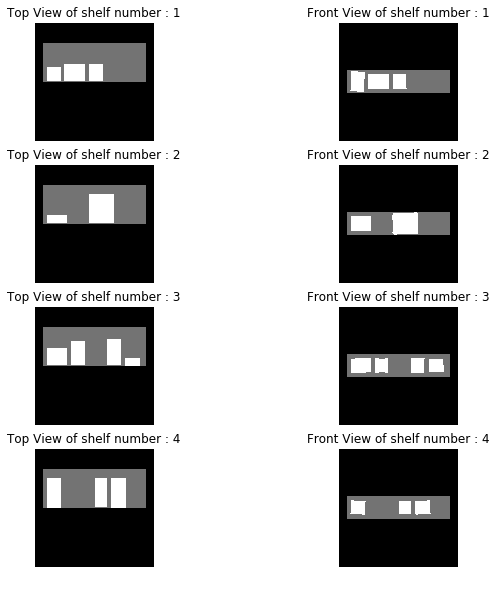

In [7]:
def getImages(labelNumber):
    
    ID = str(labelNumber).zfill(6) + ".npy"
    #relPath = "../../datasets/anuragAnnotations/warehouse/"
    relPath = "./"
    topShelf = relPath + "top"+ID
    #topBox = relPath + "topBox"+ID
    frontShelf = relPath + "front"+ID
    #frontBox = relPath + "frontBox"+ID
    
    topShelfFile = np.load(topShelf)
    #topBoxFile = np.load(topBox)
    frontShelfFile = np.load(frontShelf)
    #frontBoxFile = np.load(frontBox)
    
    frontView = []
    topView = []
    for m in range(4):
        
        ts = topShelfFile[m,:,:]
        #tb = topBoxFile[m,:,:]
        fs = frontShelfFile[m,:,:]
        #fb = frontBoxFile[m,:,:]
        
#         for i in range(len(ts)):
#             for j in range(len(ts[i])):
#                 if(fs[i,j] == 255):
#                     fs[i,j] = 115
                    
#         for i in range(len(tb)):
#             for j in range(len(tb[i])):
#                 if(fb[i,j] == 255):
#                     #print("Here")
#                     fs[i,j] = 255
                    
#         for i in range(len(ts)):
#             for j in range(len(ts[i])):
#                 if(ts[i,j] == 255):
#                     ts[i,j] = 115
                    
#         for i in range(len(tb)):
#             for j in range(len(tb[i])):
#                 if(tb[i,j] == 255):
#                     ts[i,j] = 255
                    
        frontView.append(fs)
        topView.append(ts)
    return frontView, topView
                    
#         plt.imshow(ts,cmap="gray")
#         plt.imshow(fs,cmap="gray")
#         plt.show()

def viz_layouts(frontView, topView):
    plt.figure()
    fig, ax = plt.subplots(nrows=4, ncols=2,figsize=(10,10))

    m = 0
    for row in ax:
        for col in row:
            if(m%2 == 0):
                cv2.imwrite("front"+str(int(m/2))+".png", topView[int(m/2)])
                col.imshow(topView[int(m/2)], cmap="gray")
                col.title.set_text('Top View of shelf number : %d'% (int(m/2)+1))
            else:
                cv2.imwrite("top"+str(int(m/2))+".png", frontView[int(m/2)])
                col.imshow(frontView[int(m/2)], cmap="gray")
                col.title.set_text('Front View of shelf number : %d'% (int(m/2)+1))
            col.axis('off')
            m += 1
    plt.show()
            

labelNumberToAnnotate = 302
frontView, topView = getImages(labelNumberToAnnotate)
viz_layouts(frontView, topView)
